### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
from datetime import datetime, timedelta
import scipy.stats


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.option_context('float_format','{:.2f}'.format)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


Problem 1
Create a vector of five numbers of your choice between 0 and 10, save that vector to an object, and use the sum() function to calculate the sum of the numbers

In [2]:
import random

In [3]:
randomlist = random.sample(range(0, 10), 5)

In [4]:
df = pd.Series(data=randomlist)

In [5]:
df

0    6
1    1
2    9
3    0
4    4
dtype: int64

In [6]:
df.sum()

20

Problem 2

Create a data frame that includes two columns. One column must have the numbers 1 through 5, and the other column must have the numbers 6 through 10. The first column must be named “alpha” and the second column must be named “beta”. Name the object “my_dat”. Display the data

In [7]:
columns = ["alpha","beta"]

In [8]:
my_dat = pd.DataFrame(data={"alpha":[1, 2, 3, 4, 5],
                       "beta":[6, 7, 8, 9, 10]}, columns=columns)

In [9]:
my_dat

,alpha,beta
0,1,6
1,2,7
2,3,8
3,4,9
4,5,10


Problem 3

Using the data frame created in Problem 2, use the summary() command a create a five-number summary for the column named “beta”.

In [10]:
my_dat.beta.describe()

count     5.000000
mean      8.000000
std       1.581139
min       6.000000
25%       7.000000
50%       8.000000
75%       9.000000
max      10.000000
Name: beta, dtype: float64

Problem 4

There is code for importing the example survey data that will run automatically in the setup chunk for this report (Line 13). Using that data, make a boxplot of the Family Income column using the Base R function(not a figure drawn using qplot). Include your name in the title for the plot. Your name should be in the title. Relabel that x-axis as “Family Income”

In [11]:
sample = pd.read_csv("cces_sample_coursera.csv")

In [12]:
sample

,caseid,region,gender,educ,edloan,race,hispanic,employ,marstat,pid7,ideo5,pew_religimp,newsint,faminc_new,union,investor,CC18_308a,CC18_310a,CC18_310b,CC18_310c,CC18_310d,CC18_325a,CC18_325b,CC18_325c,CC18_325d
0,417614315,3,1,2,2.0,1,2,5,3,6,3,1.0,2,1,3.0,2,2,2.0,3.0,3.0,5.0,1.0,2.0,1.0,1.0
1,415490556,1,2,6,2.0,1,1,1,1,2,2,3.0,3,12,3.0,2,4,3.0,2.0,5.0,5.0,2.0,2.0,2.0,1.0
2,414351505,3,2,3,2.0,2,2,1,4,2,3,1.0,3,4,3.0,1,4,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0
3,411855339,1,2,5,2.0,6,2,5,3,3,1,2.0,1,6,2.0,1,4,3.0,3.0,3.0,3.0,2.0,1.0,2.0,1.0
4,417056957,2,1,2,NaN,4,2,8,5,1,1,4.0,2,4,3.0,2,4,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,410945270,2,1,6,2.0,1,2,5,1,3,3,2.0,1,14,3.0,1,4,2.0,2.0,3.0,2.0,2.0,1.0,2.0,1.0
996,414240025,2,2,5,1.0,2,2,1,5,1,2,2.0,3,6,3.0,2,4,2.0,3.0,3.0,2.0,2.0,2.0,1.0,2.0
997,420156780,2,2,5,2.0,1,2,1,5,2,3,3.0,1,6,3.0,1,4,2.0,2.0,3.0,2.0,1.0,2.0,2.0,1.0
998,412382118,2,2,6,NaN,3,2,5,1,5,4,1.0,1,9,3.0,1,1,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0


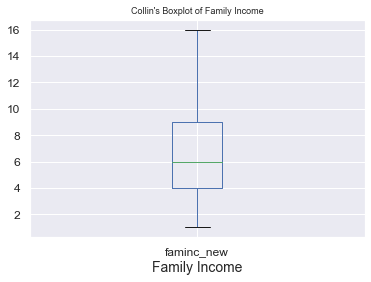

In [13]:
sample["faminc_new"].plot(kind="box", title= "Collin's Boxplot of Family Income")
plt.xlabel("Family Income")
plt.show()

Problem 5

Using the survey data, filter to subset the survey data so you only have male survey respondents who live in the northwest or midwest of the United States, are married, and identify as being interested in the news most of the time.

In [14]:
sample.head()

,caseid,region,gender,educ,edloan,race,hispanic,employ,marstat,pid7,ideo5,pew_religimp,newsint,faminc_new,union,investor,CC18_308a,CC18_310a,CC18_310b,CC18_310c,CC18_310d,CC18_325a,CC18_325b,CC18_325c,CC18_325d
0,417614315,3,1,2,2.0,1,2,5,3,6,3,1.0,2,1,3.0,2,2,2.0,3.0,3.0,5.0,1.0,2.0,1.0,1.0
1,415490556,1,2,6,2.0,1,1,1,1,2,2,3.0,3,12,3.0,2,4,3.0,2.0,5.0,5.0,2.0,2.0,2.0,1.0
2,414351505,3,2,3,2.0,2,2,1,4,2,3,1.0,3,4,3.0,1,4,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0
3,411855339,1,2,5,2.0,6,2,5,3,3,1,2.0,1,6,2.0,1,4,3.0,3.0,3.0,3.0,2.0,1.0,2.0,1.0
4,417056957,2,1,2,NaN,4,2,8,5,1,1,4.0,2,4,3.0,2,4,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0


In [15]:
sample[(sample["region"] == 1) | (sample["region"] == 2) & (sample["gender"] == 1) & (sample["marstat"] == 1) & (sample["newsint"] == 1)]

,caseid,region,gender,educ,edloan,race,hispanic,employ,marstat,pid7,ideo5,pew_religimp,newsint,faminc_new,union,investor,CC18_308a,CC18_310a,CC18_310b,CC18_310c,CC18_310d,CC18_325a,CC18_325b,CC18_325c,CC18_325d
1,415490556,1,2,6,2.0,1,1,1,1,2,2,3.0,3,12,3.0,2,4,3.0,2.0,5.0,5.0,2.0,2.0,2.0,1.0
3,411855339,1,2,5,2.0,6,2,5,3,3,1,2.0,1,6,2.0,1,4,3.0,3.0,3.0,3.0,2.0,1.0,2.0,1.0
5,420208067,2,1,3,2.0,1,2,1,1,4,5,4.0,1,10,1.0,2,4,2.0,2.0,3.0,2.0,1.0,2.0,1.0,1.0
6,412517331,1,1,2,2.0,1,2,5,5,5,4,3.0,2,6,3.0,1,1,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0
8,412948037,1,1,5,1.0,1,2,1,1,1,1,4.0,1,11,2.0,1,4,3.0,3.0,3.0,5.0,2.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,412350107,1,2,3,2.0,2,2,2,4,2,2,1.0,2,2,3.0,2,4,2.0,3.0,2.0,5.0,2.0,1.0,2.0,1.0
988,413261069,1,1,3,2.0,1,1,1,3,5,3,2.0,1,6,1.0,1,1,3.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0
991,414118145,1,1,4,2.0,1,2,1,6,2,4,3.0,2,3,3.0,2,2,3.0,2.0,3.0,2.0,1.0,1.0,1.0,2.0
992,412285035,1,2,2,2.0,1,2,7,1,5,3,3.0,1,6,1.0,1,2,3.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0


Problem 6

Filter the data the same as in Problem 5. Use a R function to create a frequency table for the responses for the question asking whether these survey respondents are invested in the stock market.

In [16]:
investor = sample[(sample["region"] == 1) | (sample["region"] == 2) & (sample["gender"] == 1) & (sample["marstat"] == 1) & (sample["newsint"] == 1)]

In [17]:
investor["investor"].value_counts()

1    126
2    108
Name: investor, dtype: int64

Problem 7

Going back to using all rows in the dataset, create a new column in the data using mutate that is equal to either 0, 1, or 2, to reflect whether the respondent supports increasing the standard deduction from 12,000 to 25,000, supports cutting the corporate income tax rate from 39 to 21 percent, or both. Name the column “tax_scale”. Hint: you’ll need to use recode() as well.

In [18]:
sample.head()

,caseid,region,gender,educ,edloan,race,hispanic,employ,marstat,pid7,ideo5,pew_religimp,newsint,faminc_new,union,investor,CC18_308a,CC18_310a,CC18_310b,CC18_310c,CC18_310d,CC18_325a,CC18_325b,CC18_325c,CC18_325d
0,417614315,3,1,2,2.0,1,2,5,3,6,3,1.0,2,1,3.0,2,2,2.0,3.0,3.0,5.0,1.0,2.0,1.0,1.0
1,415490556,1,2,6,2.0,1,1,1,1,2,2,3.0,3,12,3.0,2,4,3.0,2.0,5.0,5.0,2.0,2.0,2.0,1.0
2,414351505,3,2,3,2.0,2,2,1,4,2,3,1.0,3,4,3.0,1,4,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0
3,411855339,1,2,5,2.0,6,2,5,3,3,1,2.0,1,6,2.0,1,4,3.0,3.0,3.0,3.0,2.0,1.0,2.0,1.0
4,417056957,2,1,2,NaN,4,2,8,5,1,1,4.0,2,4,3.0,2,4,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0


In [19]:
df3 = sample[["CC18_325d","CC18_325a"]]

In [20]:
df3

,CC18_325d,CC18_325a
0,1.0,1.0
1,1.0,2.0
2,2.0,1.0
3,1.0,2.0
4,1.0,2.0
...,...,...
995,1.0,2.0
996,2.0,2.0
997,1.0,1.0
998,1.0,1.0


In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CC18_325d  999 non-null    float64
 1   CC18_325a  999 non-null    float64
dtypes: float64(2)
memory usage: 15.8 KB


In [22]:
df3["tax_scale"] = df3["CC18_325a"] * df3["CC18_325d"]

In [23]:
df3.head()

,CC18_325d,CC18_325a,tax_scale
0,1.0,1.0,1.0
1,1.0,2.0,2.0
2,2.0,1.0,2.0
3,1.0,2.0,2.0
4,1.0,2.0,2.0


In [24]:
def fun(num): 
  
    if num == 1.0: 
        return "Both"
  
    else: 
        return "Single"

In [25]:
df3["tax_scale"] = df3["tax_scale"].apply(fun)

In [26]:
df3

,CC18_325d,CC18_325a,tax_scale
0,1.0,1.0,Both
1,1.0,2.0,Single
2,2.0,1.0,Single
3,1.0,2.0,Single
4,1.0,2.0,Single
...,...,...,...
995,1.0,2.0,Single
996,2.0,2.0,Single
997,1.0,1.0,Both
998,1.0,1.0,Both


Problem 8

Use a frequency table command to show how many 0s, 1s, and 2s are in the column you created in Problem 7.

In [27]:
df3["CC18_325d"].value_counts(ascending=False)

1.0    747
2.0    252
Name: CC18_325d, dtype: int64

In [28]:
df3["CC18_325a"].value_counts(ascending=True)

1.0    474
2.0    525
Name: CC18_325a, dtype: int64

Problem 9

Again using all rows in the original dataset, use summarise and group_by to calculate the average (mean)
job of approval for President Trump in each of the four regions listed in the “region” column

In [29]:
sample.region.value_counts()

3    389
2    225
4    196
1    190
Name: region, dtype: int64

In [30]:
sample.groupby(["region"]).mean()

,caseid,gender,educ,edloan,race,hispanic,employ,marstat,pid7,ideo5,pew_religimp,newsint,faminc_new,union,investor,CC18_308a,CC18_310a,CC18_310b,CC18_310c,CC18_310d,CC18_325a,CC18_325b,CC18_325c,CC18_325d
region,,,,,,,,,,,,,,,,,,,,,,,,
1,4.145501e+08,1.500000,3.847368,1.674699,1.457895,1.947368,3.100000,2.957895,3.484211,2.847368,2.531579,1.605263,6.878947,2.500000,1.494737,2.789474,2.915789,3.189474,3.021053,2.922652,1.497354,1.357895,1.489474,1.247368
2,4.144013e+08,1.546667,3.604444,1.712121,1.355556,1.991111,3.364444,2.631111,3.533333,3.013333,2.337778,1.711111,6.346667,2.568889,1.555556,2.835556,2.466667,2.951111,3.035556,2.829596,1.511111,1.293333,1.475556,1.222222
3,4.145364e+08,1.557841,3.771208,1.802292,1.431877,1.979434,3.542416,2.724936,3.884319,3.133676,2.079692,1.688946,6.308483,2.746770,1.568123,2.691517,2.405759,2.780105,2.492147,2.803150,1.498715,1.296392,1.479381,1.252577
4,4.144330e+08,1.576531,3.836735,1.818681,1.622449,1.959184,3.224490,2.698980,3.346939,2.795918,2.492308,1.622449,6.780612,2.561224,1.591837,3.025510,2.882653,2.959184,3.015306,3.066327,1.622449,1.408163,1.551020,1.290816


Problem 10

Again start with all rows in the original dataset, use summarise() to create a summary table for survey
respondents who are not investors and who have an annual family income of between 40,000 and 119,999
per year. The table should have the mean, median and standard deviations for the importance of religion
column.

In [31]:
sample.investor.unique()

array([2, 1], dtype=int64)

Problem 11

Use kable() and the the summarise() function to create a table with one row and three columns that provides
the mean, median, and standard deviation for the column named faminc_new in the survey data.

In [32]:
sample["faminc_new"].describe()

count    1000.000000
mean        6.518000
std         3.292494
min         1.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        16.000000
Name: faminc_new, dtype: float64

Problem 12

With the survey data, use qplot() to make a histogram of the column named pid7. Change the x-axis label to
“Seven Point Party ID” and the y-axis label to “Count”

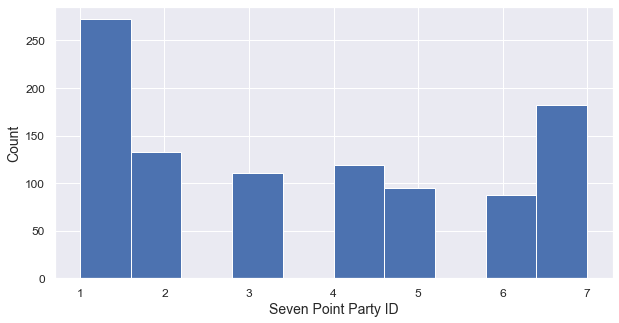

In [33]:
sample.pid7.hist(figsize=(10,5))
plt.xlabel("Seven Point Party ID")
plt.ylabel("Count")
plt.show()